In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd/content/drive/MyDrive/Assignment3

/content/drive/MyDrive/Assignment3


In [ ]:
ls

Flowers-Dataset.zip


In [ ]:
pwd

'/content/drive/MyDrive/Assignment3'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

In [ ]:
#importing required libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
batch_size = 32
img_height = 180
img_width = 180
data_dir = "/content/drive/MyDrive/Assignment3/flowers"

Image Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, zoom_range = 0.2)
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Assignment3/flowers", target_size = (64,64) , class_mode = "categorical", batch_size = 100)

Found 4317 images belonging to 5 classes.


Create Model and Split dataset into training and testing sets

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


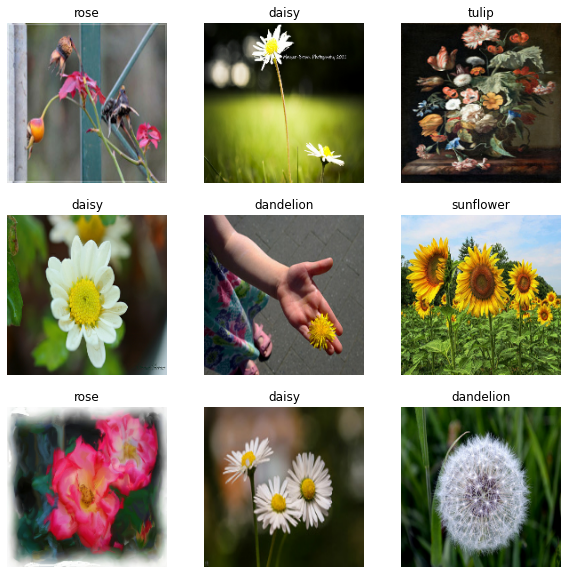

In [ ]:
class_names = train_ds.class_names
print(class_names)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Add Layers (Convolution,MaxPooling,Flatten,Dense-(HiddenLayers),Output)

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model.add(Convolution2D(32, (3,3), activation = "relu", input_shape = (64,64,3) )) #Convolution layer

In [ ]:
model.add(MaxPooling2D(pool_size = (2,2))) #MaxPooling

In [ ]:
model.add(Flatten()) #Flatten

In [ ]:
model.add(Dense(300, activation = "relu"))

In [ ]:
model.add(Dense(150, activation = "relu")) #mulitple dense layers

In [ ]:
model.add(Dense(5, activation = "softmax")) #output layer

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
 dense (Dense)               (None, 300)               9225900   
                                                                 
 dense_1 (Dense)             (None, 150)               45150     
                                                                 
 dense_2 (Dense)             (None, 5)                 755       
                                                      

Compile The Model

In [ ]:
model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = "adam")
len(x_train)

44

Fit The Model

In [ ]:
model.fit(x_train, epochs = 15, steps_per_epoch = len(x_train))

Epoch 1/15
44/44 [==============================] - 38s 835ms/step - loss: 1.7383 - accuracy: 0.3380
Epoch 2/15
44/44 [==============================] - 35s 782ms/step - loss: 1.1819 - accuracy: 0.5129
Epoch 3/15
44/44 [==============================] - 37s 831ms/step - loss: 1.1039 - accuracy: 0.5534
Epoch 4/15
44/44 [==============================] - 37s 833ms/step - loss: 1.0430 - accuracy: 0.5874
Epoch 5/15
44/44 [==============================] - 36s 805ms/step - loss: 0.9937 - accuracy: 0.6048
Epoch 6/15
44/44 [==============================] - 35s 789ms/step - loss: 0.9458 - accuracy: 0.6229
Epoch 7/15
44/44 [==============================] - 39s 860ms/step - loss: 0.9087 - accuracy: 0.6405
Epoch 8/15
44/44 [==============================] - 35s 793ms/step - loss: 0.8899 - accuracy: 0.6502
Epoch 9/15
44/44 [==============================] - 35s 791ms/step - loss: 0.8631 - accuracy: 0.6681
Epoch 10/15
44/44 [==============================] - 41s 930ms/step - loss: 0.8376 - accura

Save The Model

In [ ]:
model.save("flowers.h1")

Test The Model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np 

In [ ]:
model = load_model("/content/drive/MyDrive/Assignment3/flowers.h1")

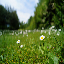

In [ ]:
img = image.load_img("/content/drive/MyDrive/Assignment3/flowers/daisy/11870378973_2ec1919f12.jpg", target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
x.ndim

3

In [ ]:
x = np.expand_dims(x,axis = 0)
x.ndim

4

In [ ]:
model.predict(x)

array([[1., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels = ['daisy','dandelion','roses','sunflowers','tulips']
labels[np.argmax(model.predict(x))]

'daisy'